In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix,r2_score
from sklearn import feature_selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
data=pd.read_csv('dat.csv',index_col='customerID')

In [3]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,1,0,1,0,0 phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,0,0,45,0,0 phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [4]:
data.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,1.000000


In [5]:
data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
data.shape

(7043, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(13), object(6)
memory usage: 1.1+ MB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


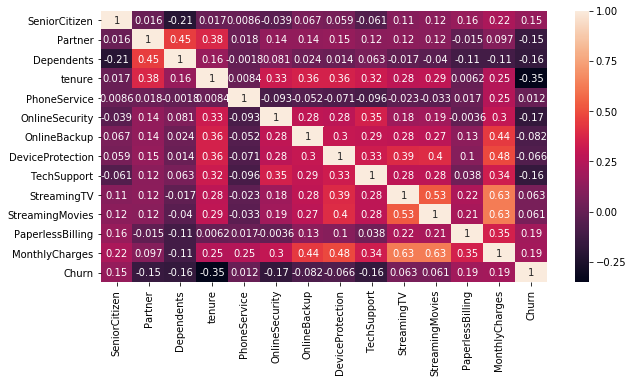

In [9]:
plt.figure(figsize=(10,5))
mat_corr=data.corr()
sns.heatmap(mat_corr,annot=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Gender_n']=encoder.fit_transform(data['gender'])
print(data.head())

            gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                                     
7590-VHVEG  Female              0        1           0       1             0   
5575-GNVDE    Male              0        0           0      34             1   
3668-QPYBK    Male              0        0           0       2             1   
7795-CFOCW    Male              0        0           0      45             0   
9237-HQITU  Female              0        0           0       2             1   

              MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
customerID                                                                  
7590-VHVEG  0 phone service             DSL               0             1   
5575-GNVDE                0             DSL               1             0   
3668-QPYBK                0             DSL               1             1   
7795-CFOCW  0 phone service             DSL           

1.063031444575135


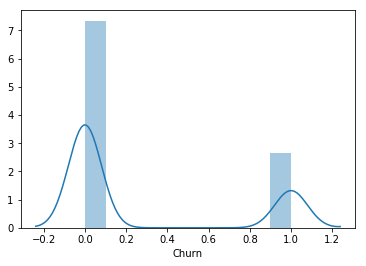

In [11]:
sns.distplot(data['Churn'])
print(data['Churn'].skew())


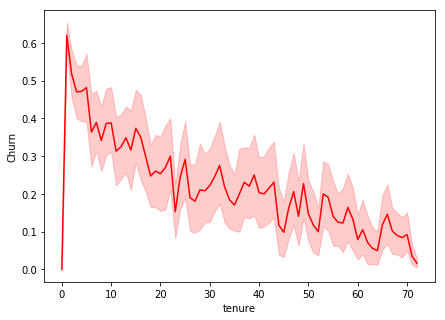

In [12]:
plt.figure(figsize=(7,5))
sns.lineplot(x=data['tenure'],y=data['Churn'],color='red')

In [13]:
data['Payment_method']=encoder.fit_transform(data['PaymentMethod'])
print(data.head(7))

            gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                                     
7590-VHVEG  Female              0        1           0       1             0   
5575-GNVDE    Male              0        0           0      34             1   
3668-QPYBK    Male              0        0           0       2             1   
7795-CFOCW    Male              0        0           0      45             0   
9237-HQITU  Female              0        0           0       2             1   
9305-CDSKC  Female              0        0           0       8             1   
1452-KIOVK    Male              0        0           1      22             1   

              MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
customerID                                                                  
7590-VHVEG  0 phone service             DSL               0             1   
5575-GNVDE                0             DSL     

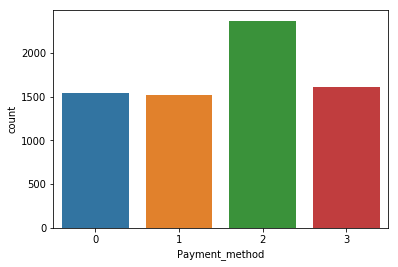

In [14]:
sns.countplot(data['Payment_method'])

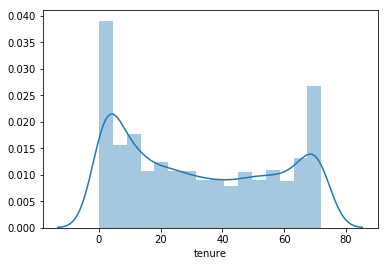

In [15]:
sns.distplot(data['tenure'])

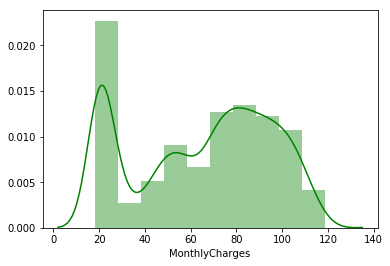

In [16]:
sns.distplot(data['MonthlyCharges'],bins=10,color='green')

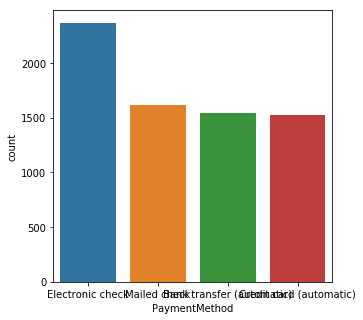

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(data['PaymentMethod'])

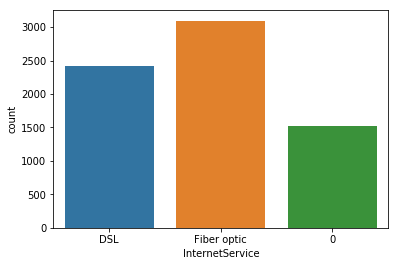

In [18]:
sns.countplot(data['InternetService'])

In [19]:
data['internet_service']=encoder.fit_transform(data['InternetService'])
print(data.head())

            gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                                     
7590-VHVEG  Female              0        1           0       1             0   
5575-GNVDE    Male              0        0           0      34             1   
3668-QPYBK    Male              0        0           0       2             1   
7795-CFOCW    Male              0        0           0      45             0   
9237-HQITU  Female              0        0           0       2             1   

              MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
customerID                                                                  
7590-VHVEG  0 phone service             DSL               0             1   
5575-GNVDE                0             DSL               1             0   
3668-QPYBK                0             DSL               1             1   
7795-CFOCW  0 phone service             DSL           

In [20]:
internet_service_mode=stats.mode(data['internet_service'])
print(internet_service_mode)

ModeResult(mode=array([2]), count=array([3096]))


In [21]:
data['internet_service'].isnull().any()

False

In [22]:
data['internet_service'].fillna(np.NaN)

customerID
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
9237-HQITU    2
9305-CDSKC    2
1452-KIOVK    2
6713-OKOMC    1
7892-POOKP    2
6388-TABGU    1
9763-GRSKD    1
7469-LKBCI    0
8091-TTVAX    2
0280-XJGEX    2
5129-JLPIS    2
3655-SNQYZ    2
8191-XWSZG    0
9959-WOFKT    2
4190-MFLUW    1
4183-MYFRB    2
8779-QRDMV    1
1680-VDCWW    0
1066-JKSGK    0
3638-WEABW    1
6322-HRPFA    1
6865-JZNKO    1
6467-CHFZW    2
8665-UTDHZ    1
5248-YGIJN    1
8773-HHUOZ    1
             ..
1685-BQULA    2
9053-EJUNL    2
0666-UXTJO    2
1471-GIQKQ    1
4807-IZYOZ    0
1122-JWTJW    2
9710-NJERN    0
9837-FWLCH    0
1699-HPSBG    1
7203-OYKCT    2
1035-IPQPU    2
7398-LXGYX    2
2823-LKABH    2
8775-CEBBJ    1
0550-DCXLH    1
9281-CEDRU    1
2235-DWLJU    1
0871-OPBXW    0
3605-JISKB    1
6894-LFHLY    2
9767-FFLEM    2
0639-TSIQW    2
8456-QDAVC    2
7750-EYXWZ    1
2569-WGERO    0
6840-RESVB    1
2234-XADUH    2
4801-JZAZL    1
8361-LTMKD    2
3186-AJIEK    2
Name: interne

In [23]:
data['internet_service']=data['internet_service'].replace(np.NaN,2)

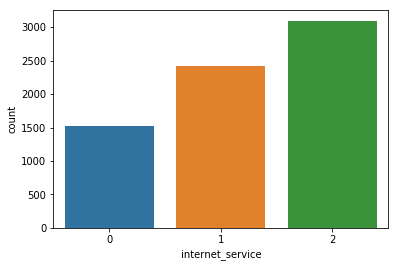

In [24]:
sns.countplot(data['internet_service'])


In [25]:
data['internet_service'].isnull().any()

False

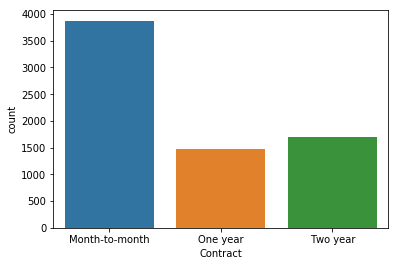

In [26]:
sns.countplot(data['Contract'])

In [27]:
data['en_contract']=encoder.fit_transform(data['Contract'])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender_n,Payment_method,internet_service,en_contract
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,1,0,1,0,0 phone service,DSL,0,1,...,Month-to-month,1,Electronic check,29.85,29.85,0,0,2,1,0
5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,...,One year,0,Mailed check,56.95,1889.5,0,1,3,1,1
3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,3,1,0
7795-CFOCW,Male,0,0,0,45,0,0 phone service,DSL,1,0,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,1,1
9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,0,2,2,0


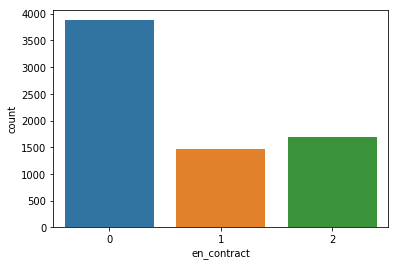

In [28]:
sns.countplot(data['en_contract'])

In [29]:
data['en_contract'].isnull().any()

False

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 24 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
Gender_n            7043 non-null int32
Payment_method      7043 non-null i

In [31]:
data.drop(['gender','PaymentMethod','InternetService','Contract'],axis=1,inplace=True)

In [32]:
data.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Gender_n,Payment_method,internet_service,en_contract
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,1,0,0 phone service,0,1,0,0,0,0,1,29.85,29.85,0,0,2,1,0
5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,1,3,1,1
3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,3,1,0
7795-CFOCW,0,0,0,45,0,0 phone service,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,1,1
9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,2,2,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
PaperlessBilling    7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
Gender_n            7043 non-null int32
Payment_method      7043 non-null int32
internet_service    7043 non-null int32
en_contract         7043 non-null int32
dtypes: float64(1), int32(4), int64(13), object(2)
memory usage: 1.3+ MB


In [34]:
data.drop(['MultipleLines'],axis=1,inplace=True)

In [35]:
data.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Gender_n,Payment_method,internet_service,en_contract
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,0,2,1,0
5575-GNVDE,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.5,0,1,3,1,1
3668-QPYBK,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,1,3,1,0
7795-CFOCW,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,1,1
9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1,0,2,2,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
PaperlessBilling    7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
Gender_n            7043 non-null int32
Payment_method      7043 non-null int32
internet_service    7043 non-null int32
en_contract         7043 non-null int32
dtypes: float64(1), int32(4), int64(13), object(1)
memory usage: 1.3+ MB


In [37]:
data["TotalCharges"] = pd.to_numeric(data.TotalCharges,errors='coerce')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
PaperlessBilling    7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
Gender_n            7043 non-null int32
Payment_method      7043 non-null int32
internet_service    7043 non-null int32
en_contract         7043 non-null int32
dtypes: float64(2), int32(4), int64(13)
memory usage: 1.3+ MB


In [39]:
data['TotalCharges'].isnull().any()

True

In [40]:
data['TotalCharges'].isnull().sum()

11

In [41]:
zero_not_accepted=['TotalCharges']
for column in zero_not_accepted:
    data[column]=data[column].replace(0,np.NaN)
    mean=int(data[column].mean(skipna=True))
    data[column]=data[column].replace(np.NaN,mean)
print(data[column])

customerID
7590-VHVEG      29.85
5575-GNVDE    1889.50
3668-QPYBK     108.15
7795-CFOCW    1840.75
9237-HQITU     151.65
9305-CDSKC     820.50
1452-KIOVK    1949.40
6713-OKOMC     301.90
7892-POOKP    3046.05
6388-TABGU    3487.95
9763-GRSKD     587.45
7469-LKBCI     326.80
8091-TTVAX    5681.10
0280-XJGEX    5036.30
5129-JLPIS    2686.05
3655-SNQYZ    7895.15
8191-XWSZG    1022.95
9959-WOFKT    7382.25
4190-MFLUW     528.35
4183-MYFRB    1862.90
8779-QRDMV      39.65
1680-VDCWW     202.25
1066-JKSGK      20.15
3638-WEABW    3505.10
6322-HRPFA    2970.30
6865-JZNKO    1530.60
6467-CHFZW    4749.15
8665-UTDHZ      30.20
5248-YGIJN    6369.45
8773-HHUOZ    1093.10
               ...   
1685-BQULA    3756.40
9053-EJUNL    3645.75
0666-UXTJO    2874.45
1471-GIQKQ      49.95
4807-IZYOZ    1020.75
1122-JWTJW      70.65
9710-NJERN     826.00
9837-FWLCH     239.00
1699-HPSBG     727.80
7203-OYKCT    7544.30
1035-IPQPU    6479.40
7398-LXGYX    3626.35
2823-LKABH    1679.40
8775-CEBBJ     403.35

In [42]:
data['TotalCharges'].isnull().any()

False

In [43]:
data['TotalCharges'].isnull().sum()

0

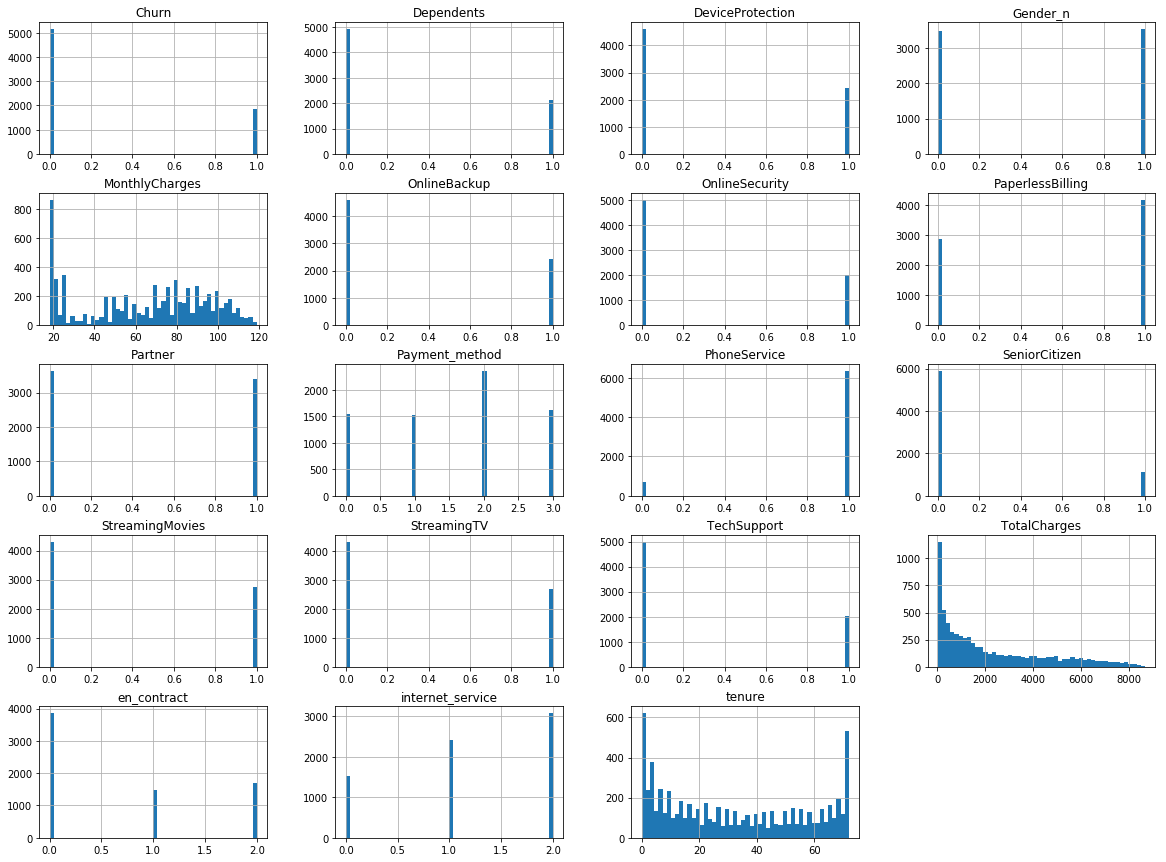

In [44]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [45]:
x=data.drop(['Churn'],axis=1)
y=data['Churn']

In [46]:
bestfeatures=SelectKBest(score_func=f_classif,k=5)
fit=bestfeatures.fit_transform(x,y)
cols=x.columns.values[bestfeatures.get_support()]
print(cols)
scores=bestfeatures.scores_[bestfeatures.get_support()]
print(scores)
name_scores=list(zip(cols,scores))
print(name_scores)
newdata=pd.DataFrame(name_scores)

['tenure' 'MonthlyCharges' 'TotalCharges' 'internet_service' 'en_contract']
[ 997.2680105   273.46370421  291.6286419   785.73887812 1315.08887221]
[('tenure', 997.2680104991426), ('MonthlyCharges', 273.46370420771046), ('TotalCharges', 291.62864189752196), ('internet_service', 785.7388781150353), ('en_contract', 1315.0888722077957)]


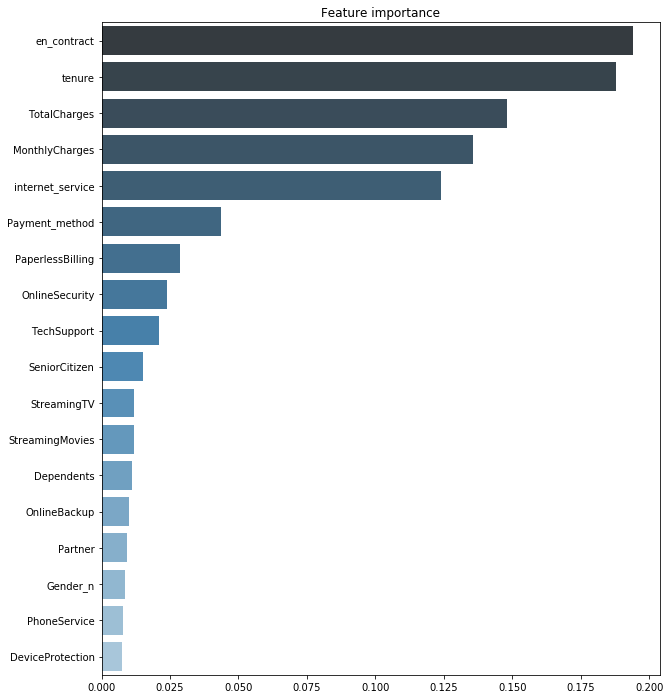

In [77]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
data = pd.get_dummies(data)
# Drop redundant columns (for features with two unique values)

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(x_train, y_train)

# Make predictions
prediction_test = model_rf.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8034066713981547


In [47]:
x1=data[['tenure','MonthlyCharges','TotalCharges','internet_service','en_contract']]

In [48]:
x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size = 0.3,random_state = 42)

In [49]:
classifier = DecisionTreeClassifier()
classifier.fit(x1_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
y_pred = classifier.predict(x1_test)

In [51]:
print(confusion_matrix(y_test, y_pred))

[[1264  275]
 [ 294  280]]


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1539
           1       0.50      0.49      0.50       574

   micro avg       0.73      0.73      0.73      2113
   macro avg       0.66      0.65      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [53]:
r2_score(y_test,y_pred)

-0.3610097963970451

In [54]:
print("The accuracy of the model is :" ,accuracy_score(y_test, y_pred)*100)

The accuracy of the model is : 73.07146237576904


In [55]:
model2=LogisticRegression()
model2.fit(x1_train,y_train)

C:\Users\souvi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
logreg_pred=model2.predict(x1_test)

In [57]:
r2_score(y_test,logreg_pred)

-0.0333149948040834

In [58]:
print("The accuracy score is :",accuracy_score(y_test,logreg_pred)*100,"%")

The accuracy score is : 79.5551348793185 %


In [59]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.66      0.50      0.57       574

   micro avg       0.80      0.80      0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.80      0.79      2113



In [60]:
print(confusion_matrix(y_test, logreg_pred))

[[1392  147]
 [ 285  289]]


In [61]:
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(x1_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [62]:
KNN_pred = KNNclassifier.predict(x1_test)

In [63]:
print(confusion_matrix(y_test, KNN_pred))

[[1366  173]
 [ 306  268]]


In [64]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1539
           1       0.61      0.47      0.53       574

   micro avg       0.77      0.77      0.77      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



In [65]:
print("Accuracy score is  :",accuracy_score(y_test,KNN_pred)*100,"%")

Accuracy score is  : 77.33080927591102 %


In [66]:
r2_score(y_test,KNN_pred)

-0.14573583914619426

In [67]:
model1=GaussianNB()
model1.fit(x1_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
GNB_pred=model1.predict(x1_test)

In [69]:
print(confusion_matrix(y_test,GNB_pred))

[[1106  433]
 [ 120  454]]


In [70]:
print(classification_report(y_test, GNB_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1539
           1       0.51      0.79      0.62       574

   micro avg       0.74      0.74      0.74      2113
   macro avg       0.71      0.75      0.71      2113
weighted avg       0.80      0.74      0.75      2113



In [71]:
print("Accuracy score is  :",accuracy_score(y_test,GNB_pred)*100,"%")

Accuracy score is  : 73.82867960246095 %


In [72]:
r2_score(y_test,GNB_pred)

-0.32273887066356055

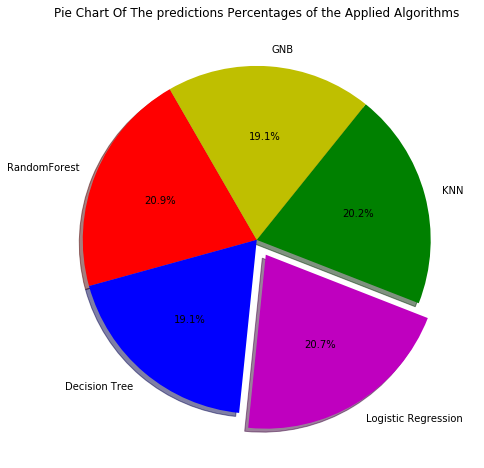

In [87]:
plt.figure(figsize=(10,8))
slices = [80,73,79,77,73]
activities = ['RandomForest','Decision Tree','Logistic Regression','KNN','GNB']
cols = ['r','b','m','g','y']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=120,
        shadow= True,
        explode=(0,0,0.1,0,0),
       autopct='%1.1f%%')

plt.title('Pie Chart Of The predictions Percentages of the Applied Algorithms')
plt.show()